### Source

https://jakevdp.github.io/PythonDataScienceHandbook/04.13-geographic-data-with-basemap.html

https://www.kaggle.com/daveianhickey/using-basemap-for-geographical-data

https://makersportal.com/blog/2018/7/20/geographic-mapping-from-a-csv-file-using-python-and-basemap

https://matplotlib.org/basemap/users/examples.html

In [ ]:
!python3 -m pip install basemap

In [10]:
import os
import conda

conda_file_dir = conda.__file__
conda_dir = conda_file_dir.split('lib')[0]
proj_lib = os.path.join(os.path.join(conda_dir, 'share'), 'proj')
os.environ["PROJ_LIB"] = proj_lib

from mpl_toolkits.basemap import Basemap

In [11]:
import pandas as pd

In [12]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

/Users/vinodgattani/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  """
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


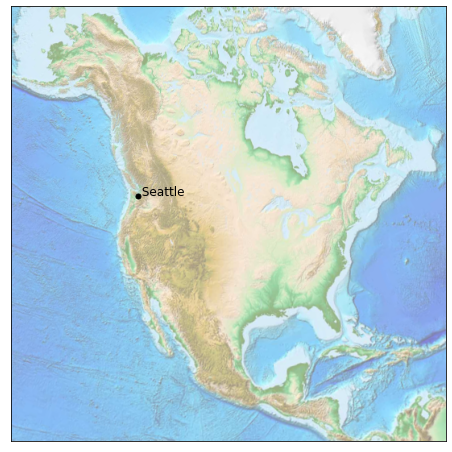

In [14]:
fig = plt.figure(figsize=(8, 8))

m = Basemap(projection='lcc', 
            width=8E6, height=8E6,
            lat_0=45, lon_0=-100,)
m.etopo(scale=0.5, alpha=0.5)

x, y = m(-122.3, 47.6)
plt.plot(x, y, 'ok', markersize=5)
plt.text(x, y, ' Seattle', fontsize=12)
plt.show()

In [15]:
cities = pd.read_csv("california_cities.csv")

In [16]:
cities.head()

,Unnamed: 0,city,latd,longd,elevation_m,elevation_ft,population_total,area_total_sq_mi,area_land_sq_mi,area_water_sq_mi,area_total_km2,area_land_km2,area_water_km2,area_water_percent
0,0,Adelanto,34.576111,-117.432778,875.0,2871.0,31765,56.027,56.009,0.018,145.107,145.062,0.046,0.03
1,1,AgouraHills,34.153333,-118.761667,281.0,922.0,20330,7.822,7.793,0.029,20.260,20.184,0.076,0.37
2,2,Alameda,37.756111,-122.274444,NaN,33.0,75467,22.960,10.611,12.349,59.465,27.482,31.983,53.79
3,3,Albany,37.886944,-122.297778,NaN,43.0,18969,5.465,1.788,3.677,14.155,4.632,9.524,67.28
4,4,Alhambra,34.081944,-118.135000,150.0,492.0,83089,7.632,7.631,0.001,19.766,19.763,0.003,0.01


In [17]:
lat = cities['latd'].values
lon = cities['longd'].values
population = cities['population_total'].values
area = cities['area_total_km2'].values

/Users/vinodgattani/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  after removing the cwd from sys.path.
/Users/vinodgattani/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  
/Users/vinodgattani/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  if __name__ == '__main__':


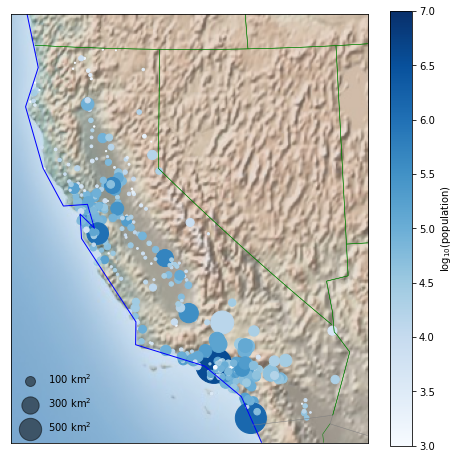

In [20]:
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', 
            lat_0=37.5, lon_0=-119,
            width=1E6, height=1.2E6)

m.shadedrelief()
m.drawcoastlines(color='blue')
m.drawcountries(color='gray')
m.drawstates(color='green')


m.scatter(lon, lat, latlon=True,
          c=np.log10(population), s=area,
          cmap='Blues')

plt.colorbar(label=r'$\log_{10}({\rm population})$')
plt.clim(3, 7)


for a in [100, 300, 500]:
    plt.scatter([], [], c='k', alpha=0.5, s=a,
                label=str(a) + ' km$^2$')

plt.legend(scatterpoints=1, frameon=False,
           labelspacing=1, loc='lower left');


https://plotly.com/python/maps/ 

https://plotly.com/python/choropleth-maps/ 


Plotly has really read tools for creating maps 

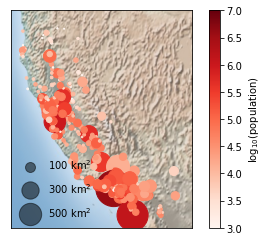

In [9]:
# 1. Draw the map background


m.shadedrelief()
#m.etopo(scale=0.9, alpha=0.5)


# 2. scatter city data, with color reflecting population
# and size reflecting area
m.scatter(lon, lat, latlon=True,
          c=np.log10(population), s=area,
          cmap='Reds')

# 3. create colorbar and legend
plt.colorbar(label=r'$\log_{10}({\rm population})$')
plt.clim(3, 7)

# make legend with dummy points
for a in [100, 300, 500]:
    plt.scatter([], [], c='k', alpha=0.5, s=a,
                label=str(a) + ' km$^2$')

plt.legend(scatterpoints=1, frameon=False,
           labelspacing=1, loc='lower left');


In [ ]:
cities[['latd','longd','population_total','area_land_km2']].to_csv("cities_sub.csv", index=False)

In [ ]:
cities.head()